# ResNet

In [29]:
import json5
import torch
import torchvision
from torchvision import transforms
from torchvision import models
from PIL import Image
# dir(models)

In [47]:
resnet = models.resnet101(weights=True)
resnet.eval()  # init training mode

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [48]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

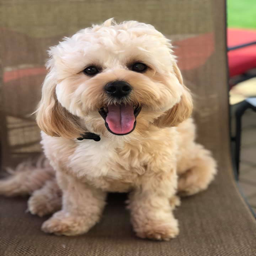

In [49]:
from PIL import Image
img = Image.open('Shih-Poo_Bobby_Worsley.jpg').resize((256, 256))
img

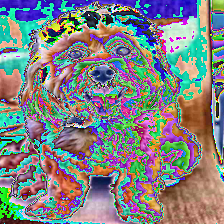

In [50]:
img_t = preprocess(img)
torchvision.transforms.functional.to_pil_image(img_t)

In [57]:
batch_t = torch.unsqueeze(img_t, 0)
img_t.size()    # torch.Size([3, 224, 224])
batch_t.size()  # torch.Size([1, 3, 224, 224])

torch.Size([1, 3, 224, 224])

In [67]:
out = resnet(batch_t)
with torch.no_grad(): print(out.shape); print(out)

torch.Size([1, 1000])
tensor([[-2.5382e+00, -1.4894e+00, -3.3715e+00, -3.8705e+00, -3.8700e+00,
         -2.9987e+00, -3.8807e+00, -8.9233e-01,  6.7062e-01, -1.1654e+00,
          1.9308e-01, -1.4939e+00, -3.5756e-01, -2.1177e+00, -1.2374e+00,
         -8.9511e-02, -1.8435e-01, -2.7002e-02, -2.2842e+00, -2.2483e-01,
         -8.3347e-01, -1.4878e+00, -1.4806e+00, -1.0364e+00, -1.8178e+00,
         -2.9740e+00, -1.4029e+00, -9.5509e-01, -2.4503e+00, -2.4308e+00,
         -3.2254e+00, -2.2350e+00,  7.4027e-02, -1.4706e+00, -9.6840e-01,
         -4.2208e-01,  1.6858e+00, -1.9232e-01, -4.2637e-01, -2.5491e+00,
         -1.0790e+00,  1.8901e+00, -3.8838e-01, -5.8254e-01, -1.0903e-01,
         -8.8737e-01, -1.7538e+00, -1.8134e+00, -3.0020e+00, -2.4514e+00,
         -2.0307e+00,  9.2607e-01,  8.5834e-01,  1.0521e+00, -1.3560e+00,
         -1.7222e+00,  1.0465e+00,  2.1613e-01,  8.9793e-02, -1.4645e-01,
          1.5841e-01, -1.9919e+00, -5.8662e-01, -6.2779e-01, -2.5206e+00,
         -2.3028

In [102]:
with open('imagenet1000_clsidx_to_labels.txt') as f:
    labels = [ line.strip() for line in f.readlines() ]
labels

["{0: 'tench, Tinca tinca',",
 "1: 'goldfish, Carassius auratus',",
 "2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',",
 "3: 'tiger shark, Galeocerdo cuvieri',",
 "4: 'hammerhead, hammerhead shark',",
 "5: 'electric ray, crampfish, numbfish, torpedo',",
 "6: 'stingray',",
 "7: 'cock',",
 "8: 'hen',",
 "9: 'ostrich, Struthio camelus',",
 "10: 'brambling, Fringilla montifringilla',",
 "11: 'goldfinch, Carduelis carduelis',",
 "12: 'house finch, linnet, Carpodacus mexicanus',",
 "13: 'junco, snowbird',",
 "14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',",
 "15: 'robin, American robin, Turdus migratorius',",
 "16: 'bulbul',",
 "17: 'jay',",
 "18: 'magpie',",
 "19: 'chickadee',",
 "20: 'water ouzel, dipper',",
 "21: 'kite',",
 "22: 'bald eagle, American eagle, Haliaeetus leucocephalus',",
 "23: 'vulture',",
 "24: 'great grey owl, great gray owl, Strix nebulosa',",
 "25: 'European fire salamander, Salamandra salamandra',",
 "26: 'c

In [120]:
_, index = torch.max(out, 1)
percentages = torch.nn.functional.softmax(out, dim=1)[0] * 100
print(index, labels[index[0]], str(int(percentages[index].item())) + '%')

tensor([200]) 200: 'Tibetan terrier, chrysanthemum dog', 43%


In [126]:
_, indices = torch.sort(out, descending=True)
print(indices[0][:5])
for index in indices[0][:5]:
    print(index, labels[index], str(int(percentages[index].item())) + '%')
    # print(index, labels[index[0]], str(int(percentages[index].item())) + '%')

tensor([200, 265, 266, 204, 153])
tensor(200) 200: 'Tibetan terrier, chrysanthemum dog', 43%
tensor(265) 265: 'toy poodle', 14%
tensor(266) 266: 'miniature poodle', 10%
tensor(204) 204: 'Lhasa, Lhasa apso', 9%
tensor(153) 153: 'Maltese dog, Maltese terrier, Maltese', 9%
